In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import subplots

plt.style.use('seaborn-v0_8')

In [40]:
data = pd.read_csv('data/datathon_data.csv', index_col=0)

In [41]:
print(data.shape)
print(data.info())
display(data.head())
data.describe()

(533009, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 533009 entries, 0 to 533008
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   WAERS   533009 non-null  object 
 1   BUKRS   533009 non-null  object 
 2   KTOSL   533009 non-null  object 
 3   PRCTR   533009 non-null  object 
 4   BSCHL   533009 non-null  object 
 5   HKONT   533009 non-null  object 
 6   DMBTR   533009 non-null  float64
 7   WRBTR   533009 non-null  float64
 8   label   533009 non-null  object 
dtypes: float64(2), object(7)
memory usage: 40.7+ MB
None


,WAERS,BUKRS,KTOSL,PRCTR,BSCHL,HKONT,DMBTR,WRBTR,label
BELNR,,,,,,,,,
0,C3,C31,C9,C92,A3,B1,280979.60,0.00,regular
1,C1,C18,C7,C76,A1,B2,129856.53,243343.00,regular
2,C1,C19,C2,C20,A1,B3,957463.97,3183838.41,regular
3,C4,C48,C9,C95,A2,B1,2681709.51,28778.00,regular
4,C5,C58,C1,C19,A3,B1,910514.49,346.00,regular


,DMBTR,WRBTR
count,5.330090e+05,5.330090e+05
mean,9.226683e+05,6.226000e+04
std,2.152291e+06,8.117304e+05
min,2.600000e+00,0.000000e+00
25%,2.159392e+05,0.000000e+00
50%,4.864455e+05,0.000000e+00
75%,9.752580e+05,2.631600e+04
max,9.244554e+07,5.958506e+07


The dataset has 533009 observations, each with 9 features (excluding BELNR which is simply the observation's index). None of the rows have missing values and 7 featrues are categorical while 2 are numerical.

There are clearly outliers in the data but these are probably anomalies and thus important for training. The distribution of our target variable (label) is highly unbalanced with 99.9% of the data being negative. This will be important to consider when training our model.

## Data Exploration
### Categorical columns

In [42]:
numerical_columns = ['DMBTR', 'WRBTR']
categorical_columns = [col for col in data.columns if col not in numerical_columns]

In [43]:
for col in categorical_columns:
    val_count = data[col].value_counts()
    print(f'{col}: {len(val_count)}')
    print('-'*50)
    print('Value counts >= 100')
    print(val_count[val_count>=100])
    print('Value counts < 100')
    print(val_count[val_count<100])

WAERS: 76
--------------------------------------------------
Value counts >= 100
WAERS
C1    275331
C2     64384
C7     27845
C4     27735
C8     27632
C9     27593
C3     27541
C6     27448
C5     27430
Name: count, dtype: int64
Value counts < 100
WAERS
Z06    2
O37    2
P37    2
J82    1
M07    1
      ..
S05    1
J38    1
U72    1
C89    1
P36    1
Name: count, Length: 67, dtype: int64
BUKRS: 158
--------------------------------------------------
Value counts >= 100
BUKRS
C13    27775
C20    27727
C19    27680
C18    27666
C16    27639
       ...  
C85     2681
C37     2679
C49     2669
C98     2665
C69     2656
Name: count, Length: 90, dtype: int64
Value counts < 100
BUKRS
S42    1
Q22    1
R47    1
S54    1
O64    1
      ..
E83    1
G77    1
D58    1
S43    1
V48    1
Name: count, Length: 68, dtype: int64
KTOSL: 79
--------------------------------------------------
Value counts >= 100
KTOSL
C1    275105
C2     64578
C7     28267
C9     27786
C8     27685
C6     27649
C4     27463

In [44]:
for col in ['BUKRS', 'PRCTR']:
    val_count = data[col].value_counts()
    val = val_count[val_count>=100].sort_index()
    print(val)


BUKRS
C10    27311
C11    27248
C12    27452
C13    27775
C14    27582
       ...  
C95     2771
C96     2770
C97     2747
C98     2665
C99     2757
Name: count, Length: 90, dtype: int64
PRCTR
C10    27500
C11    27721
C12    27519
C13    27727
C14    27066
       ...  
C95     2770
C96     2644
C97     2923
C98     2855
C99     2691
Name: count, Length: 90, dtype: int64



The features are as follows:
| Variable Name | Role               | Type           | Description                                                                                                                                           | Units        | Number of Values / Range                       | Values with many occurences (100+)|
| ------------- | ------------------ | -------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------- | ------------ | ---------------------------- |------------------------------------------------ |
| BELNR         | Identifier         | Categorical    | Einzigartige Identifikation eines Belegs                                                                                                              | -            | Unique                      |
| BUKRS         | Organizational     | Categorical    | Buchungskreis, eine Abteilung oder Bereich innerhalb eines Unternehmens                                                                               | -            | 158 unique values           | C10 - C99|
| BSCHL         | Transactional      | Categorical    | Buchungsschlüssel. Code, der den Buchungstyp angibt (z. B. Einzahlung oder Auszahlung)                                                                 | -            | 73 unique values| 3 primary values (A1, A3, A2)|
| HKONT         | Accounting         | Categorical    | Sachkonto für Finanztransaktionen                                                                                                                     | -            | 73 unique values|3 primary values (B1, B3, B2)|
| PRCTR         | Profitability      | Categorical    | Profitcenter, verfolgt Einnahmen und Kosten eines Unternehmensbereichs                                                                                | -            | 157 unique values           | C10 - C99 |
| WAERS         | Currency Identifier| Categorical    | Währungsschlüssel wie EUR, USD, usw.                                                                                                                  | -            | 76 unique values            | C1 - C9|
| KTOSL         | Accounting         | Categorical    | Sachkontoschlüssel zur Identifikation spezieller Sachkonten                                                                                           | -            | 79 unique values            | C1 - C9 |
| DMBTR         | Financial          | Numerical      | Betrag in lokaler Währung                                                                                                                             | Local currency| Range: [2.6, 92,445,540.0]  |
| WRBTR         | Financial          | Numerical      | Betrag in Belegwährung                                                                                                                                | Document currency| Range: [0.0, 59,585,060.0] |
| label         | Target/Outcome     | Categorical    | Kennzeichnet regulär oder anomal                                                                                                                      | -            | 2 unique values (regular, anomal) |

In [45]:
print(sum((data['KTOSL'] == data['WAERS'])))
print(sum(data['BUKRS'] == data['PRCTR']))


159644
16953


Though the same values are very common in the columns, they are not the same. This means that the columns are not redundant and should be kept as is.

### Numerical columns
Next we will look at the numerical columns.

In [46]:
def plot_feature_histograms(df, features):
    """
    Create a grid of histograms for specified features

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    features : list
        List of column names to plot
    """
    # Calculate grid dimensions
    n_features = len(features)
    n_cols = 4
    n_rows = (n_features + n_cols - 1) // n_cols

    # Create figure with subplots
    plt.figure(figsize=(16, 4 * n_rows))

    # Plot histograms for each feature
    for i, feature in enumerate(features, 1):
        plt.subplot(n_rows, n_cols, i)

        # Check for missing values
        feature_data = df[feature].dropna()

        # Create the histogram
        sns.histplot(feature_data)

        # Set title and labels
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


def plot_selected_boxplots(df, features):
    """
    Create a boxplot for specified features using long-form data

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame
    features : list
        List of column names to plot
    """
    # Prepare long-form data for boxplot
    df_long = df[features].melt(var_name='Feature', value_name='Value')

    # Create the figure and boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Feature', y='Value', data=df_long)

    # Customize the plot
    plt.title('Boxplots of Meteorological Features', fontsize=15)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

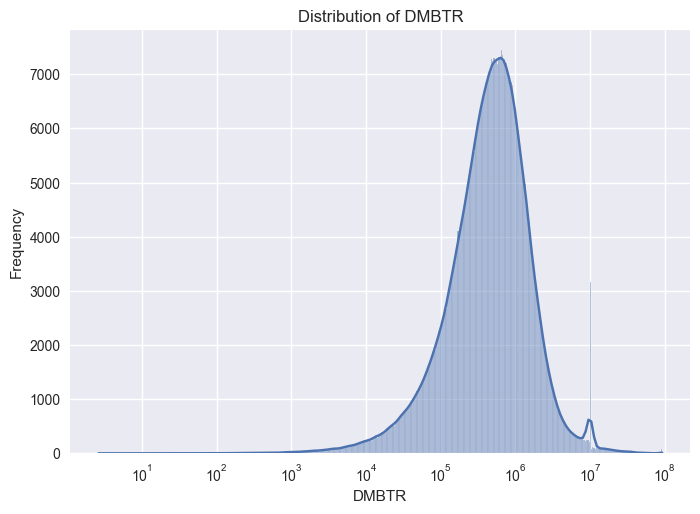

C:\Users\flori\anaconda3\envs\standard\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


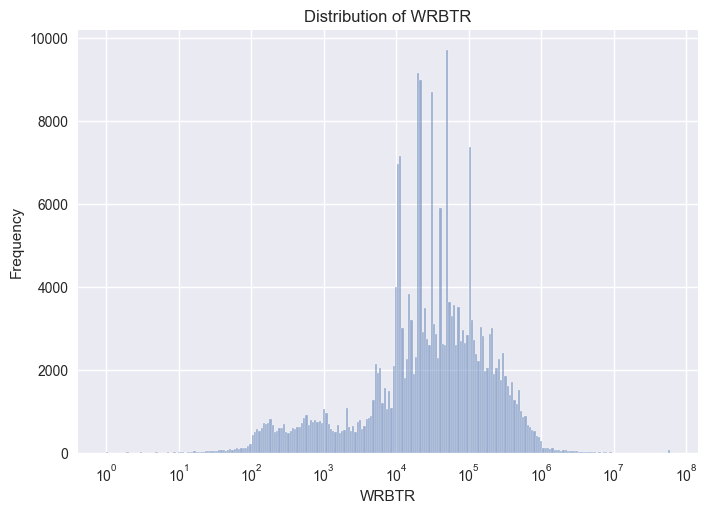

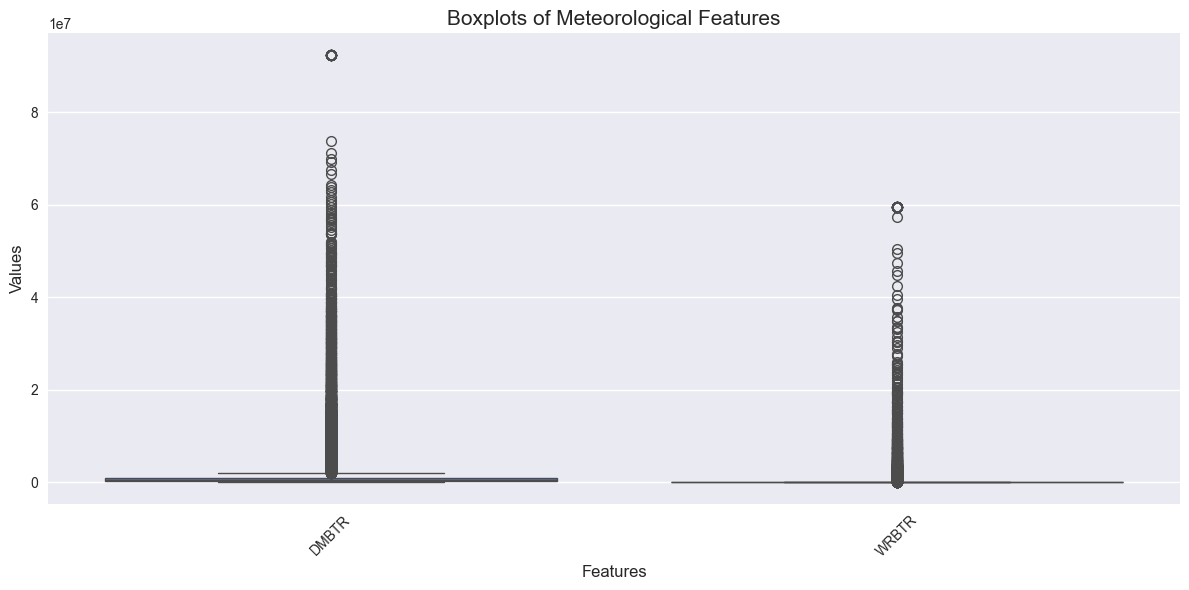

In [47]:
for col in numerical_columns:
    sns.histplot(data[col], kde=True, log_scale=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
plot_selected_boxplots(data, numerical_columns)

As the data ranges over several orders of magnitude, we will need to scale the data before training our model. The data is also highly skewed and will need to be transformed. We will use the log transformation to scale the data.

In [48]:
data[numerical_columns] = data[numerical_columns] + 1e-7
data[numerical_columns] = data[numerical_columns].apply(np.log)

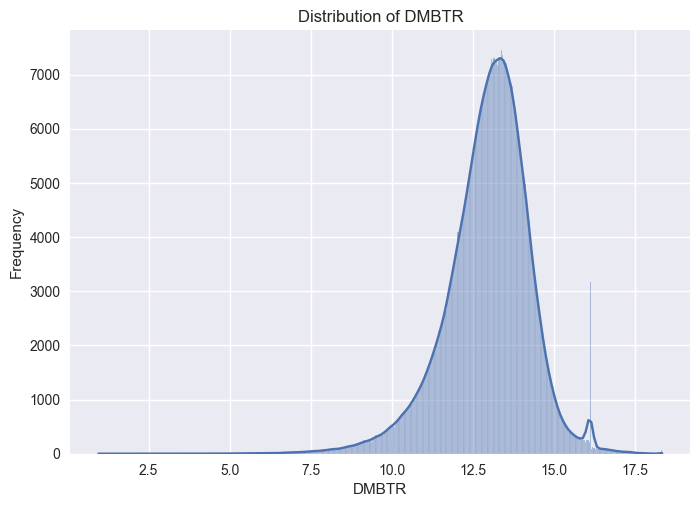

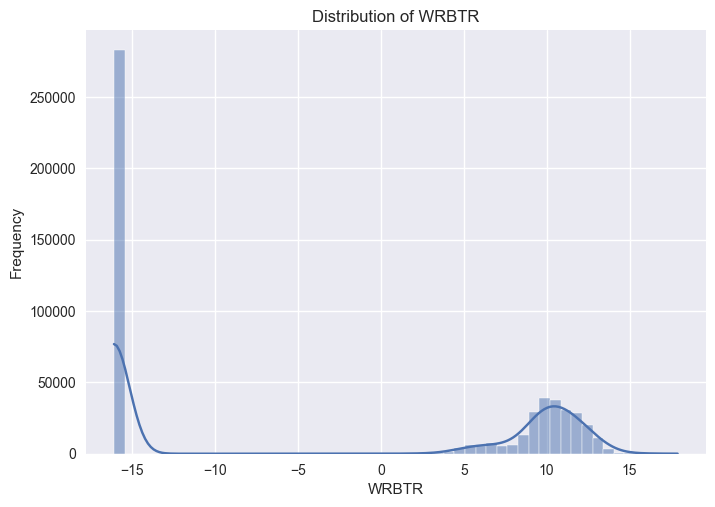

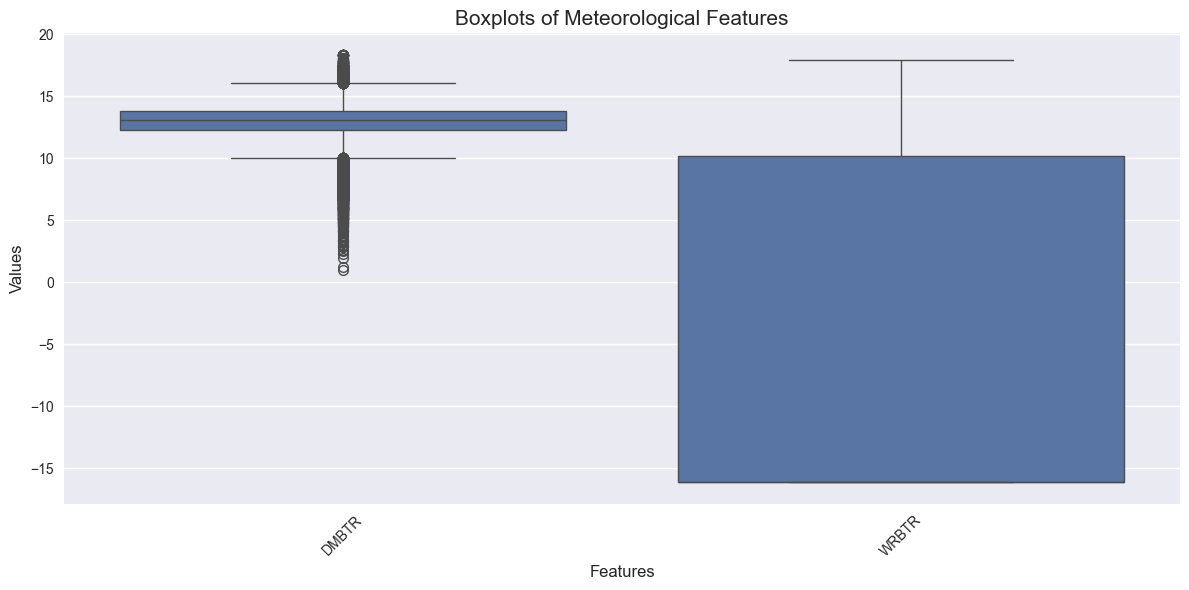

In [50]:
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
plot_selected_boxplots(data, numerical_columns)

In [56]:
data[data['WRBTR'] > 0]['label'].value_counts()

label
regular    250126
anomal        100
Name: count, dtype: int64

Next lets explore the distributions on the different label categories:

In [58]:
print(data[data['label'] == 'regular'].describe())
print(data[data['label'] == 'anomal'].describe())

               DMBTR          WRBTR
count  532909.000000  532909.000000
mean       12.969843      -3.809993
std         1.300407      13.161630
min         0.955511     -16.118096
25%        12.282595     -16.118096
50%        13.094598     -16.118096
75%        13.790150      10.176031
max        18.342130      17.902915
            DMBTR       WRBTR
count  100.000000  100.000000
mean    16.956065   15.803517
std      2.127915    3.223039
min     13.721894   10.904643
25%     13.721924   10.905076
50%     18.342130   17.902915
75%     18.342130   17.902915
max     18.342130   17.902916


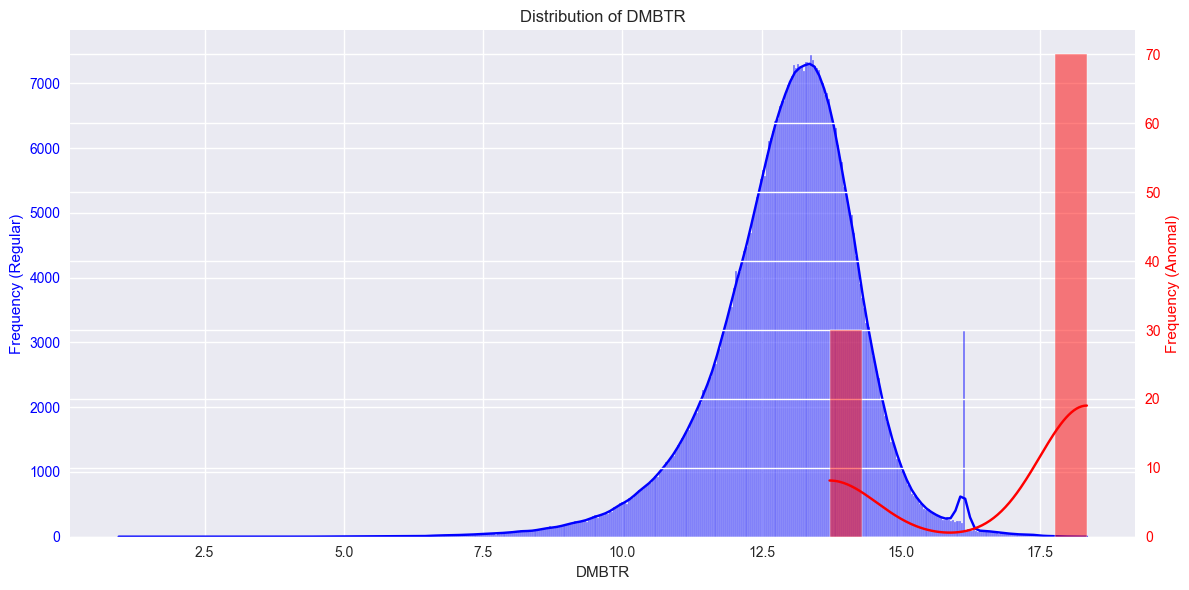

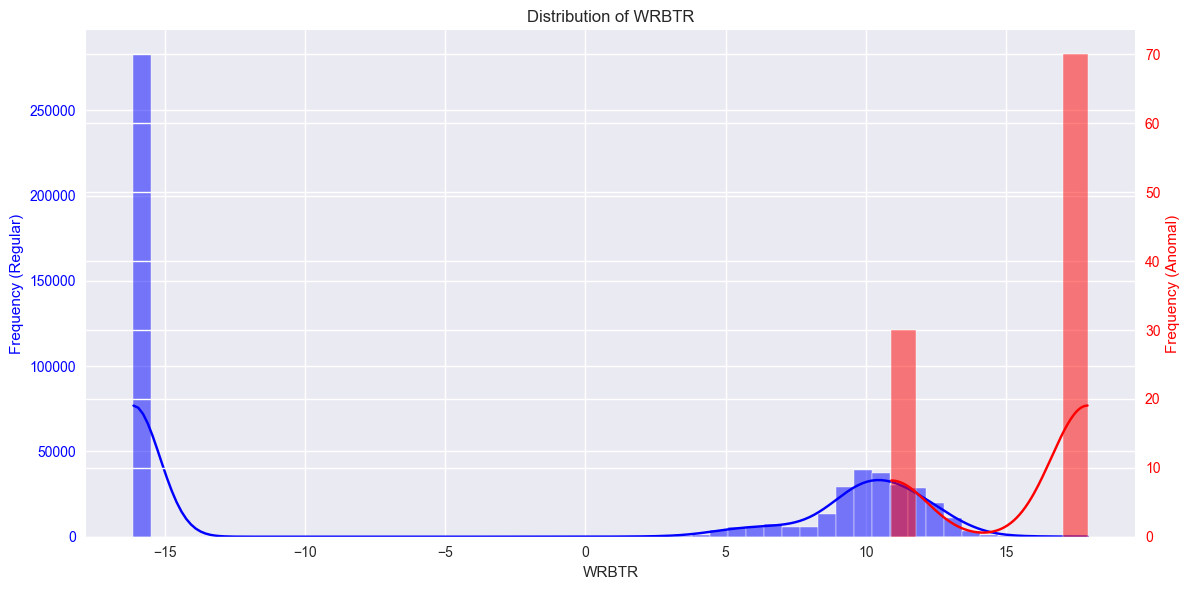

In [64]:
for col in numerical_columns:
    fig, ax1 = plt.subplots(1, 1, figsize=(12, 6))

    # Plot for regular labels
    sns.histplot(data[data['label'] == 'regular'][col], kde=True, color='blue', label='regular', alpha=0.5, ax=ax1)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency (Regular)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Distribution of {col}')

    # Create a second y-axis for anomal
    ax2 = ax1.twinx()
    sns.histplot(data[data['label'] == 'anomal'][col], kde=True, color='red', label='anomal', alpha=0.5, ax=ax2)
    ax2.set_ylabel('Frequency (Anomal)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add legend for better understanding
    fig.tight_layout()
    plt.show()